# Tu primer random forest con scikit-learn

In [ ]:
#Importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Utilizaremos el dataset **Pima indians diabetes** de Kaggle: https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv

In [ ]:
#Cargamos dataset a utilizar
df_diabetes = pd.read_csv("/content/pima-indians-diabetes.csv")


## Exploración de datos

In [ ]:
#Visualizacion del dataframe
df_diabetes.sample(10)

,6,148,72,35,0,33.6,0.627,50,1
218,5,112,66,0,0,37.8,0.261,41,1
527,0,117,66,31,188,30.8,0.493,22,0
244,9,184,85,15,0,30.0,1.213,49,1
176,0,129,110,46,130,67.1,0.319,26,1
315,3,99,80,11,64,19.3,0.284,30,0
326,10,179,70,0,0,35.1,0.200,37,0
595,0,67,76,0,0,45.3,0.194,46,0
17,1,103,30,38,83,43.3,0.183,33,0
336,5,115,76,0,0,31.2,0.343,44,1
12,1,189,60,23,846,30.1,0.398,59,1


In [ ]:
#Renombramos las columnas
df_diabetes.columns = ["1. Number of times pregnant", "2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test", "3. Diastolic blood pressure (mm Hg)", "4. Triceps skin fold thickness (mm)", "5. 2-Hour serum insulin (mu U/ml)", "6. Body mass index (weight in kg/(height in m)^2)", "7. Diabetes pedigree function", "8. Age (years)",  "9. Class variable (0 or 1)"]

In [ ]:
#Verificacion de datos
df_diabetes.head()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


En este conjunto de datos hay 8 características  de entrada y 1 característica de salida / destino / target.

El significado de los nombres de las características es el siguiente:

* Número de embarazos.
* Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa.
* Presión arterial diastólica (mm Hg).
* Espesor del pliegue cutáneo del tríceps (mm).
* Insulina sérica de 2 horas (mu U / ml).
* Índice de masa corporal (peso en kg / (altura en m) ^ 2).
* Función del pedigrí de la diabetes.
* Edad (años).
* Variable de clase (0 o 1).

In [ ]:
#Analizamos el shape del objeto
print(df_diabetes.shape)

(767, 9)


In [ ]:
#Visualizamos los tipos de datos
df_diabetes.dtypes

1. Number of times pregnant                                                      int64
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
3. Diastolic blood pressure (mm Hg)                                              int64
4. Triceps skin fold thickness (mm)                                              int64
5. 2-Hour serum insulin (mu U/ml)                                                int64
6. Body mass index (weight in kg/(height in m)^2)                              float64
7. Diabetes pedigree function                                                  float64
8. Age (years)                                                                   int64
9. Class variable (0 or 1)                                                       int64
dtype: object

## Entrenamiento de random forest con scikit-learn

In [ ]:
#Separamos en X e y
# X = df_diabetes[["2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test", "6. Body mass index (weight in kg/(height in m)^2)", "7. Diabetes pedigree function"]]
X = df_diabetes.drop("9. Class variable (0 or 1)", axis = 1)
y = df_diabetes["9. Class variable (0 or 1)"]

In [ ]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 00000)

In [ ]:
#Arbol de decision
from sklearn.ensemble import RandomForestClassifier

#Creacion del modelo
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 00000)

In [ ]:
#Entrenamiento
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
#Calculo de las predicciones en Train y Test
y_train_predict = random_forest.predict(X_train)
y_test_predict = random_forest.predict(X_test)

## Evaluación del modelo

In [ ]:
#Calculo de metricas
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_predict)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_predict)

print("The accuracy train is:", train_accuracy)
print("The accuracy test is:", test_accuracy)

The accuracy train is: 1.0
The accuracy test is: 0.7705627705627706


In [ ]:
#Verificamos el feature importances
feature_importance_df = pd.DataFrame(
    {"feature": list(X.columns), "importance" : random_forest.feature_importances_}).sort_values("importance", ascending = False)
# Mostrar
feature_importance_df

,feature,importance
1,2. Plasma glucose concentration a 2 hours in a...,0.242093
5,6. Body mass index (weight in kg/(height in m)^2),0.174863
6,7. Diabetes pedigree function,0.126548
7,8. Age (years),0.123463
0,1. Number of times pregnant,0.089681
2,3. Diastolic blood pressure (mm Hg),0.088872
4,5. 2-Hour serum insulin (mu U/ml),0.081732
3,4. Triceps skin fold thickness (mm),0.072748


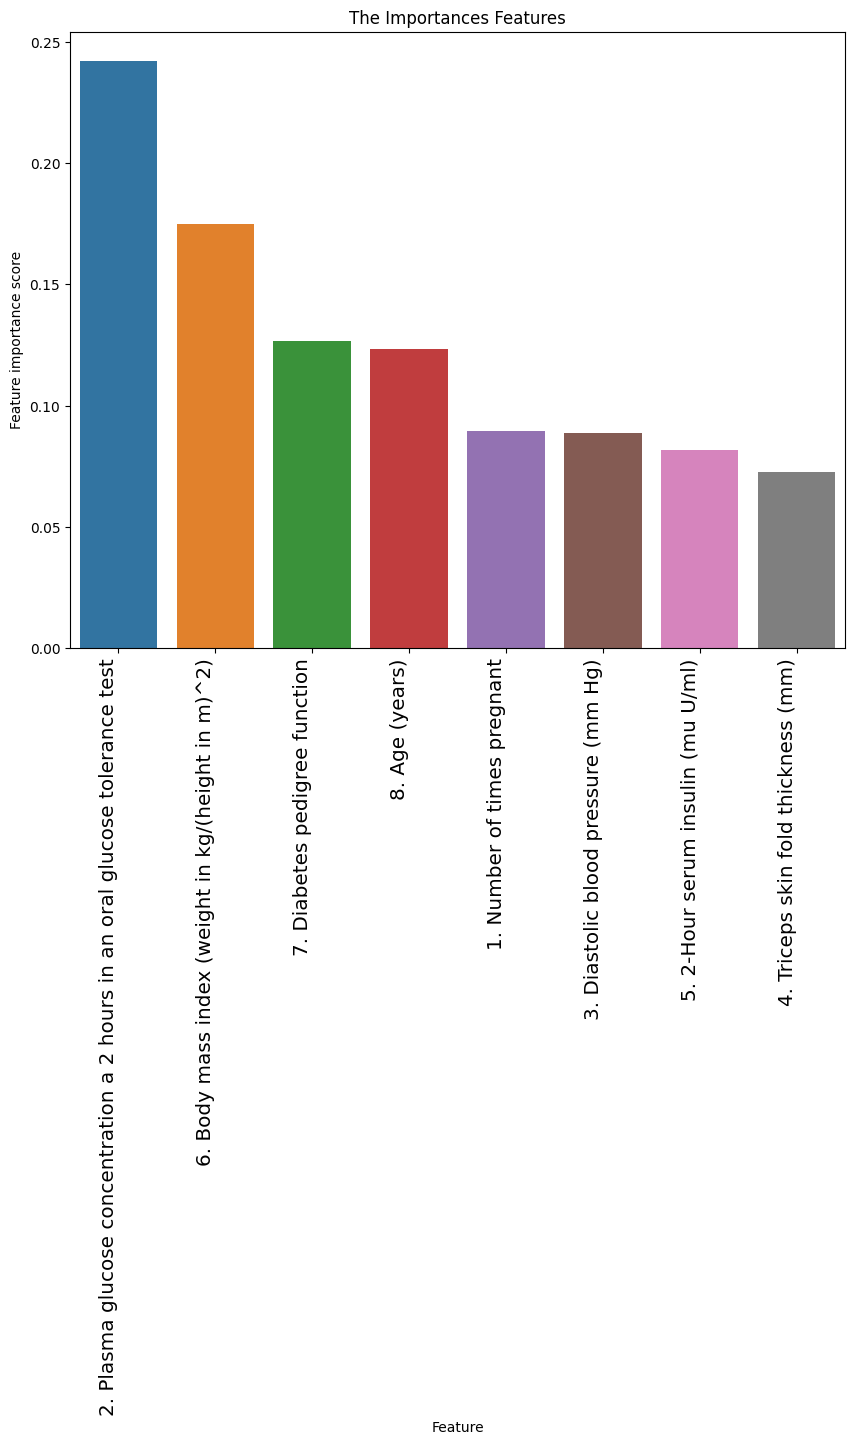

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot(data = feature_importance_df, x = "feature", y = "importance" )
plt.title("The Importances Features")
plt.xlabel("Feature")
plt.ylabel("Feature importance score")
plt.xticks(rotation = 90, horizontalalignment = "right", fontweight = "light", fontsize = "x-large")
plt.show()

**Para pensar: ¿Qué pasa si agregamos más estimadores para nuestro modelo de random forest?**